In [1]:
#Task 1.0

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV

warnings.filterwarnings('ignore')


In [2]:
#Task 1.1
#In prior EDA submission, I used Late_Payment column to spit the data evenly into 80/20

xTrainModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\X_Train_Output.csv',header=0)
xTestModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\X_Test_Output.csv',header=0)
yTrainModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\y_Train_Output.csv',header=0)bb
yTestModel=pd.read_csv(r'.\DataCapstoneProject2\ccFraudDefault\y_Test_Output.csv',header=0)


In [3]:
#Task 1.2.0
xTrainModel.info()


<bound method DataFrame.info of         CLIENTID  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       0.949579     -0.577223          0.389074    0.191860    -0.286029   
1       0.513261     -0.577223          0.116146   -0.889408    -0.784060   
2       1.287332      2.191519         -1.027662   -1.355889    -1.751443   
3      -1.068339     -0.577223          0.284235   -0.074658    -0.671044   
4      -0.179874     -0.577223          1.251599    0.894558     0.210440   
...          ...           ...               ...         ...          ...   
230628  0.072546     -0.577223         -1.615658   -1.191195    -1.537075   
230629 -0.294988      0.807148          0.116146    0.311217    -0.142532   
230630  0.778844     -0.577223          0.389074   -0.006436    -1.159310   
230631  0.478840      0.807148         -1.615658   -1.355889    -1.751443   
230632  1.133944      0.807148          0.389074   -0.791268    -0.961442   

        AMT_GOODS_PRICE  REGION_POPULATION_

In [30]:
#Task 1.2.1
xTrainModel.head()

<bound method NDFrame.head of         CLIENTID  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0       0.949579     -0.577223          0.389074    0.191860    -0.286029   
1       0.513261     -0.577223          0.116146   -0.889408    -0.784060   
2       1.287332      2.191519         -1.027662   -1.355889    -1.751443   
3      -1.068339     -0.577223          0.284235   -0.074658    -0.671044   
4      -0.179874     -0.577223          1.251599    0.894558     0.210440   
...          ...           ...               ...         ...          ...   
230628  0.072546     -0.577223         -1.615658   -1.191195    -1.537075   
230629 -0.294988      0.807148          0.116146    0.311217    -0.142532   
230630  0.778844     -0.577223          0.389074   -0.006436    -1.159310   
230631  0.478840      0.807148         -1.615658   -1.355889    -1.751443   
230632  1.133944      0.807148          0.389074   -0.791268    -0.961442   

        AMT_GOODS_PRICE  REGION_POPULATION_RE

In [31]:
xTrainModel.head()

,CLIENTID,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Permutation1,Permutation2,Permutation3,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_unknown,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_unknown,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORG

In [4]:
#Task 1.2.2
yTrainModel.head()

<bound method NDFrame.head of         LATE_PAYMENT
0                  0
1                  0
2                  0
3                  0
4                  0
...              ...
230628             0
230629             1
230630             0
230631             0
230632             0

[230633 rows x 1 columns]>

In [5]:
#Task 1.2.3
xTestModel.head()

<bound method NDFrame.head of        CLIENTID  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      0.933964     -0.577223         -1.615658   -0.870505     0.103613   
1      1.489890      0.807148         -0.198925   -0.221982    -0.275482   
2      0.443640     -0.577223         -0.491412    0.473301    -0.157255   
3     -0.514514     -0.577223          0.116146    1.346664     1.469453   
4     -0.392794     -0.577223         -0.198925    0.697900     0.328258   
...         ...           ...               ...         ...          ...   
76873 -1.214712     -0.577223          0.439544    1.772778     1.162576   
76874  0.338343      0.807148          1.039970    0.598874     2.369076   
76875 -1.367857     -0.577223         -0.832856    0.649263     0.627897   
76876  0.630535     -0.577223          0.116146    0.929085     0.433166   
76877  1.038337     -0.577223         -0.832856   -0.088711     1.117415   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_

In [6]:
#Task 1.2.4
yTestModel.head()

<bound method NDFrame.head of        LATE_PAYMENT
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
76873             0
76874             0
76875             0
76876             1
76877             0

[76878 rows x 1 columns]>

In [7]:
#Task 1.3.1
xTrainModel.shape

(230633, 173)

In [8]:
#Task 1.3.2
yTrainModel.shape

(230633, 1)

In [9]:
#Task 1.3.3
xTestModel.shape

(76878, 173)

In [10]:
#Task 1.3.4
yTestModel.shape

(76878, 1)

#Task 1.3.1   
#can markdown as i dont need to drop anymore.  all data is a float or number
#got an error doing linear regression model
#dropping columns that are not float or numberic value 
ModelCCLoan.drop(ModelCCLoan[['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', \
                              'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START', \
                              'ORGANIZATION_TYPE', 'HOUSETYPE_MODE','WALLSMATERIAL_MODE']].columns,axis=1,inplace=True)



#Task 1.3.1
ModelCCLoan.shape

#Task 1.3.2
ModelCCLoan.head(10)

#Task 1.3.3
#need to remove columns that are not floats.  I need change all N to 0 and Y to 1
#also F to 0, M to 1
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'Y':1},'CODE_GENDER':{'M':1},'FLAG_OWN_CAR':{'Y':1}},inplace=True)
ModelCCLoan.replace({'FLAG_OWN_REALTY':{'N':0},'CODE_GENDER':{'F':0},'FLAG_OWN_CAR':{'N':0}},inplace=True)


#Task 1.3.4
ModelCCLoan.head(10)

#Task 1.4
y=ModelCCLoan[['CODE_GENDER']]

#Task 1.5
X=ModelCCLoan.drop(['CODE_GENDER'],axis=1)

#Task 1.6
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

In [ ]:
logistical regression

In [ ]:
accuracy

In [ ]:
model.

Linear Regression model

In [11]:
#Task 2.0
lr = LinearRegression()
model = lr.fit(xTrainModel, yTrainModel)

In [12]:
#Task 2.1
predictions = model.predict(xTestModel)

In [13]:
#Task 2.2
print("R^2 is: \n", model.score(xTestModel, yTestModel))
print('RMSE is: \n', mean_squared_error(yTestModel, predictions))

R^2 is: 
 0.029231657273926404
RMSE is: 
 0.07203948599008683


In [18]:

actual_values.shape

(230633, 1)

In [19]:

#x train
preds_ridge.shape

(230633, 1)

Ridge Regression model

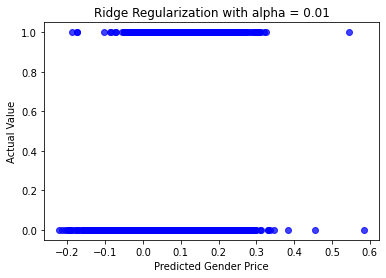

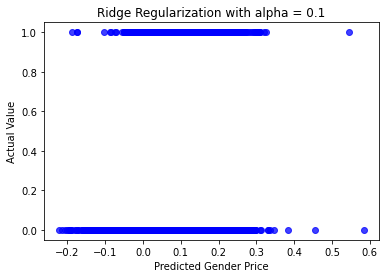

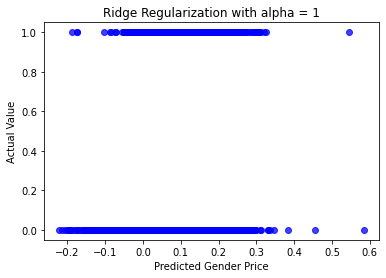

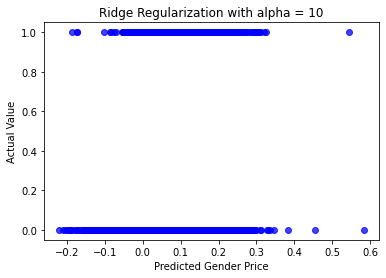

In [32]:
#Task 3.0
actual_values = yTrainModel
from sklearn import linear_model
for i in range (-2, 2):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(xTrainModel, yTrainModel)
    preds_ridge = ridge_model.predict(xTrainModel)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Gender Price')
    plt.ylabel('Actual Value')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(xTestModel, yTestModel),
                    mean_squared_error(yTrainModel, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [23]:
#Task 3.1
print("R^2 is: \n", ridge_model.score(xTrainModel, yTrainModel))
print('RMSE is: \n', mean_squared_error(yTrainModel, preds_ridge))

R^2 is: 
 0.029836336482010006
RMSE is: 
 0.07199842562103605


Lasso GridSearchCV model

In [24]:
#Task 4.0
lasso = Lasso()
params = {"alpha" : [ 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [25]:
lasso_regressor = GridSearchCV(lasso, params, cv=5)

In [26]:
lasso_model=lasso_regressor.fit(xTrainModel, yTrainModel)


In [27]:
preds_lasso=lasso_model.predict(xTestModel)

In [28]:

print("R^2 is: \n", lasso_model.score(xTestModel, yTestModel))
print('RMSE is: \n', mean_squared_error(yTestModel, preds_lasso))

R^2 is: 
 0.02733238101165969
RMSE is: 
 0.07218042886972653


In [29]:
lasso_regressor.best_estimator_


Lasso(alpha=0.001)